In [40]:
import pandas as pd
# Importa o read rda
from pyreadr import read_r
from plotnine import *

import statsmodels.api as sm
import statsmodels.formula.api as smf



- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 17587

# Exercício 1
- Faça os exercícios de aprendizado LC5.1 e LC5.8 relacionados aos conceitos básicos de regressão linear simples, conforme proposto em [30]. Verifique suas respostas no Apêndice D do mesmo livro.

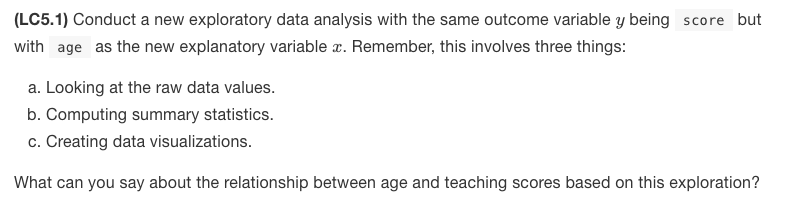

In [6]:
# Importa o dataset
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_10/evals.rda'
result = read_r(path)
df_evals = result['evals']
df_evals_ch5 = df_evals[['ID', 'score', 'bty_avg', 'age']]

display(df_evals_ch5.head())

print(f"O shape do dataset é: {df_evals_ch5.shape}")

,ID,score,bty_avg,age
0,1,4.7,5.0,36
1,2,4.1,5.0,36
2,3,3.9,5.0,36
3,4,4.8,5.0,36
4,5,4.6,3.0,59


O shape do dataset é: (463, 4)


In [7]:
# Printa as estatístticas descritivas do dataset
display(df_evals_ch5.describe())

,ID,score,bty_avg,age
count,463.000000,463.000000,463.000000,463.000000
mean,232.000000,4.174730,4.417844,48.365011
std,133.800847,0.543865,1.527380,9.802742
min,1.000000,2.300000,1.667000,29.000000
25%,116.500000,3.800000,3.167000,42.000000
50%,232.000000,4.300000,4.333000,48.000000
75%,347.500000,4.600000,5.500000,57.000000
max,463.000000,5.000000,8.167000,73.000000


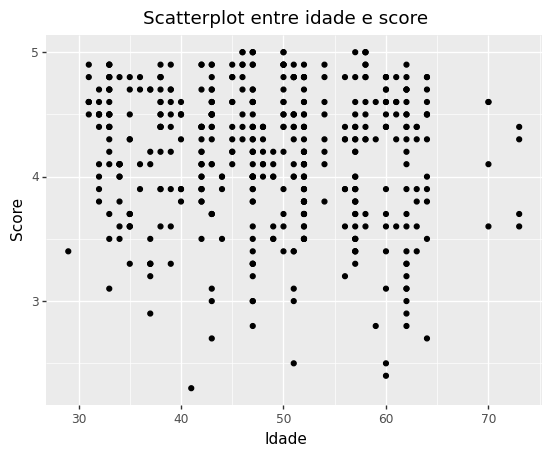

In [10]:
# Printa o scatterplot entre age e score

plot = (
    ggplot(df_evals_ch5, aes(x='age', y='score')) +
    geom_point()
    + labs(title='Scatterplot entre idade e score',
           x='Idade',
           y='Score')
)

print(plot)

**OBSERVAÇÃO:**

No scatterplot é possível notar que conforme a idade aumenta, scores baixos começam a ficar mais frequentes.

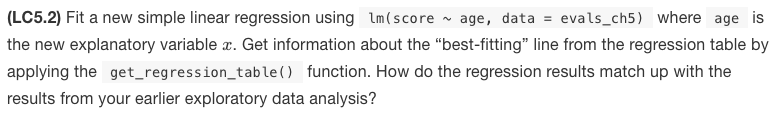

In [16]:
# Adicionar a constante (intercepto) ao modelo
df_evals_ch5 = df_evals_ch5.copy()  # Cria uma cópia explícita para evitar o aviso
df_evals_ch5.loc[:, 'const'] = 1  # Adiciona a constante de forma segura

# Ajustar o modelo de regressão
score_age_model = sm.OLS(df_evals_ch5['score'], df_evals_ch5[['const', 'age']]).fit()

# Obter a tabela de coeficientes
regression_table = score_age_model.summary2().tables[1]
display(regression_table)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,4.461932,0.126778,35.194709,1.052874e-132,4.212797,4.711068
age,-0.005938,0.002569,-2.311351,2.125363e-02,-0.010987,-0.000890


**OBSERVAÇÃO**

O coeficiente angular da reta obtida através da regressão é -0.005938, indicando que existe uma tendência do score diminuir com o avanço da idade, conforme notado na análise exploratória.

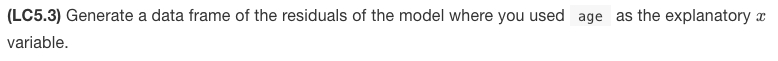

In [17]:
# Obter valores ajustados (fitted values) e resíduos (residuals)
df_evals_ch5['fitted_values'] = score_age_model.fittedvalues
df_evals_ch5['residuals'] = score_age_model.resid

# Criar um DataFrame com os pontos de regressão
score_age_regression_points = df_evals_ch5[['score', 'age', 'fitted_values', 'residuals']]
display(score_age_regression_points)


,score,age,fitted_values,residuals
0,4.7,36,4.248156,0.451844
1,4.1,36,4.248156,-0.148156
2,3.9,36,4.248156,-0.348156
3,4.8,36,4.248156,0.551844
4,4.6,59,4.111577,0.488423
...,...,...,...,...
458,4.5,32,4.271909,0.228091
459,3.5,42,4.212527,-0.712527
460,4.4,42,4.212527,0.187473
461,4.4,42,4.212527,0.187473


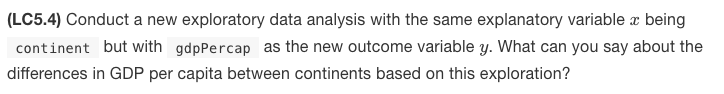

In [25]:
# Faz a leitura do dataset
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_10/gapminder.csv'
df_gapminder = pd.read_csv(path)
df_gapminder = df_gapminder[df_gapminder['year'] == 2007]
df_gapminder = df_gapminder[['country', 'continent','gdpPercap', 'lifeExp']]

print(f"O shape do dataset é: {df_gapminder.shape}")

display(df_gapminder.head())

O shape do dataset é: (142, 4)


,country,continent,gdpPercap,lifeExp
11,Afghanistan,Asia,974.580338,43.828
23,Albania,Europe,5937.029526,76.423
35,Algeria,Africa,6223.367465,72.301
47,Angola,Africa,4797.231267,42.731
59,Argentina,Americas,12779.379640,75.320


In [19]:
# Printa as estatísticas descritivas do dataset
display(df_gapminder.describe())

,gdpPercap
count,142.000000
mean,11680.071820
std,12859.937337
min,277.551859
25%,1624.842248
50%,6124.371108
75%,18008.835640
max,49357.190170


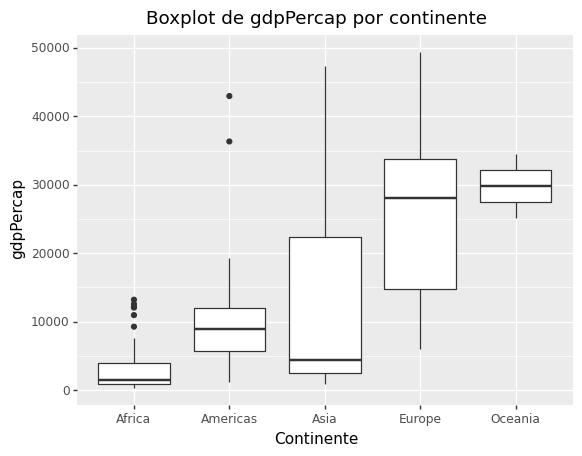

In [20]:
# Plota um boxplot de gdpPercap por continente

plot = (
    ggplot(df_gapminder, aes(x='continent', y='gdpPercap')) +
    geom_boxplot()
    + labs(title='Boxplot de gdpPercap por continente',
           x='Continente',
           y='gdpPercap')
)

print(plot)

**OBSERVAÇÕES**

A partir do boxplot, pode-se notar que cada continente possui uma distribuição de dados característica, indicando que talvez ele possa ser um fator importante em um modelo de regressão.

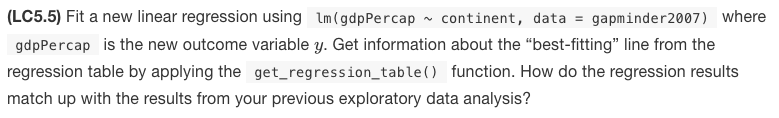

In [23]:
# Certificar-se de que 'continent' é uma variável categórica
df_gapminder['continent'] = df_gapminder['continent'].astype('category')

# Criar variáveis dummies automaticamente para a regressão (incluindo constante)
X = pd.get_dummies(df_gapminder['continent'], drop_first=True)
X = sm.add_constant(X)  # Adiciona uma constante (intercepto)

# Definir a variável dependente
y = df_gapminder['gdpPercap']

# Ajustar o modelo de regressão
gdp_model = sm.OLS(y, X).fit()

# Obter a tabela de regressão
regression_table = gdp_model.summary2().tables[1]
display(regression_table)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,3089.032605,1372.737794,2.250271,2.602549e-02,374.538046,5803.527164
Americas,7913.999021,2409.145050,3.284982,1.295033e-03,3150.080403,12677.917638
Asia,9383.994265,2203.129793,4.259392,3.785020e-05,5027.456648,13740.531883
Europe,21965.449031,2269.519348,9.678459,3.343176e-17,17477.630636,26453.267426
Oceania,26721.155670,7132.954812,3.746155,2.636808e-04,12616.228190,40826.083151


**OBSERVAÇÃO:**

Foi possível definir com sucesso um modelo de regressão que utiliza os continentes como um parâmetro preditor. Além disso, verificou-se que os coeficientes de tais preditores tem valores significativos, reforçando a ideia de que continentes tem influência no GPD, conforme levantado na análise exploratória.

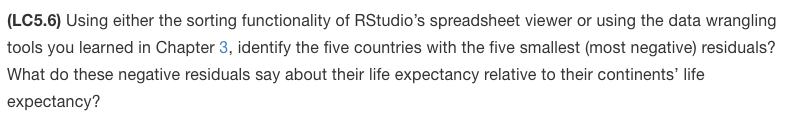

In [26]:
# Certificar-se de que 'continent' é uma variável categórica
df_gapminder['continent'] = df_gapminder['continent'].astype('category')

# Criar variáveis dummies automaticamente para a regressão (incluindo constante)
X = pd.get_dummies(df_gapminder['continent'], drop_first=True)
X = sm.add_constant(X)  # Adiciona uma constante (intercepto)

# Definir a variável dependente
y = df_gapminder['lifeExp']

# Ajustar o modelo de regressão
lifeExp_model = sm.OLS(y, X).fit()

# Obter a tabela de regressão
regression_table = lifeExp_model.summary2().tables[1]
display(regression_table)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,54.806038,1.025447,53.446016,1.230613e-93,52.778288,56.833789
Americas,18.802082,1.799652,10.447623,3.744223e-19,15.243394,22.360769
Asia,15.922446,1.645756,9.674850,3.413979e-17,12.668076,19.176817
Europe,22.842562,1.695350,13.473655,7.099697e-27,19.490124,26.195000
Oceania,25.913462,5.328377,4.863293,3.122425e-06,15.376962,36.449961


In [28]:
# Obter valores ajustados (fitted values) e resíduos (residuals)
df_gapminder['fitted_values'] = lifeExp_model.fittedvalues
df_gapminder['residuals'] = lifeExp_model.resid

# Criar um DataFrame com os pontos de regressão
lifeExp_regression_points = df_gapminder[['country', 'lifeExp', 'continent', 'fitted_values','residuals']]
display(lifeExp_regression_points)



,country,lifeExp,continent,fitted_values,residuals
11,Afghanistan,43.828,Asia,70.728485,-26.900485
23,Albania,76.423,Europe,77.648600,-1.225600
35,Algeria,72.301,Africa,54.806038,17.494962
47,Angola,42.731,Africa,54.806038,-12.075038
59,Argentina,75.320,Americas,73.608120,1.711880
...,...,...,...,...,...
1655,Vietnam,74.249,Asia,70.728485,3.520515
1667,West Bank and Gaza,73.422,Asia,70.728485,2.693515
1679,"Yemen, Rep.",62.698,Asia,70.728485,-8.030485
1691,Zambia,42.384,Africa,54.806038,-12.422038


In [29]:
# Encontra os 5 países com os menores resíduos

top_5_countries = lifeExp_regression_points.sort_values('residuals').head(5)

display(top_5_countries)

,country,lifeExp,continent,fitted_values,residuals
11,Afghanistan,43.828,Asia,70.728485,-26.900485
1463,Swaziland,39.613,Africa,54.806038,-15.193038
1043,Mozambique,42.082,Africa,54.806038,-12.724038
647,Haiti,60.916,Americas,73.608120,-12.692120
1691,Zambia,42.384,Africa,54.806038,-12.422038


**OBSERVAÇÕES:**

O fato do resíduo ser negativo implica que o movelo trouxe uma previsão maior do que o valor real. Neste problema em específico, o único preditor utilizado é o continente, portanto ter um resíduo negativo, implica que a expectativa de vida do país avaliado é menor que a média do continente.

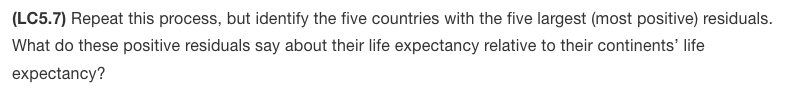

In [33]:
# Encontra os 5 países com os maiores resíduos

bottom_5_countries = lifeExp_regression_points.sort_values('residuals', ascending=False).head(5)

display(bottom_5_countries)

,country,lifeExp,continent,fitted_values,residuals
1271,Reunion,76.442,Africa,54.806038,21.635962
911,Libya,73.952,Africa,54.806038,19.145962
1571,Tunisia,73.923,Africa,54.806038,19.116962
983,Mauritius,72.801,Africa,54.806038,17.994962
35,Algeria,72.301,Africa,54.806038,17.494962


**OBSERVAÇÕES:**

Conforme a tabela acima, os 5 países com maiores resíduos se encontram na África. O valor do resíduo indica o número de anos que a expectativa de vida do país é maior que a média do continente. Isso sugere também que a África possui uma média bem baixa em comparação aos outros continentes, visto que as expectativas de vida dos países de maior resíduo estão por volta dos 70 anos, o que é relativamente comum em outros continentes.

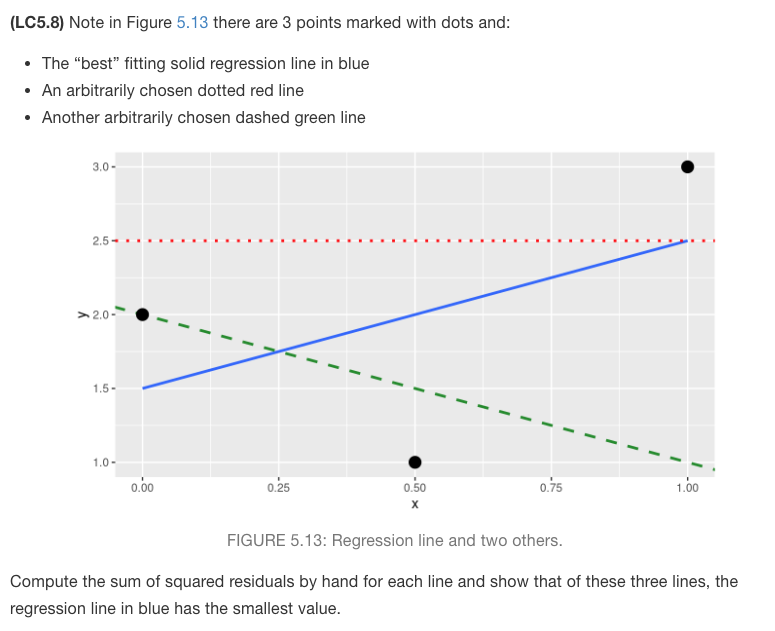

**FALTA RESOLVER ISSO AQUI**

# Exercício 2
- 2. Fa¸ca os exerc´ıcios de aprendizado LC6.1 e LC6.3 relacionados `a regress˜ao multivariada, conforme proposto em [30]. Verifique suas respostas no apˆendice D do mesmo livro.

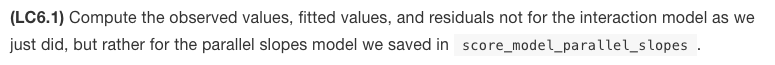

In [44]:
# Importa o dataset evals
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_10/evals.rda'
result = read_r(path)
df_evals = result['evals']
df_evals_ch6 = df_evals[['ID', 'score', 'age', 'gender']]

display(df_evals_ch6.head())

print(f"O shape do dataset é: {df_evals_ch6.shape}")

,ID,score,age,gender
0,1,4.7,36,female
1,2,4.1,36,female
2,3,3.9,36,female
3,4,4.8,36,female
4,5,4.6,59,male


O shape do dataset é: (463, 4)


In [57]:
# Ajustar modelo de regressão com interação entre age e gender
model = smf.ols('score ~ age + gender', data=df_evals_ch6).fit()

# Obter a tabela de coeficientes
regression_table = model.summary().tables[1]

display(regression_table)


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.4841,0.125,35.792,0.000,4.238,4.730
gender[T.male],0.1906,0.052,3.632,0.000,0.087,0.294
age,-0.0087,0.003,-3.280,0.001,-0.014,-0.003


In [58]:
# Obter valores ajustados (fitted values) e resíduos (residuals)
df_evals_ch6 = df_evals_ch6.copy()  # Cria uma cópia explícita para evitar o aviso
df_evals_ch6.loc[:,'fitted_values'] = model.fittedvalues
df_evals_ch6.loc[:,'residuals'] = model.resid

# Criar um DataFrame com os pontos de regressão
model_regression_points = df_evals_ch6[['ID', 'score', 'age', 'gender', 'fitted_values','residuals']]
display(model_regression_points)



,ID,score,age,gender,fitted_values,residuals
0,1,4.7,36,female,4.171720,0.528280
1,2,4.1,36,female,4.171720,-0.071720
2,3,3.9,36,female,4.171720,-0.271720
3,4,4.8,36,female,4.171720,0.628280
4,5,4.6,59,male,4.162705,0.437295
...,...,...,...,...,...,...
458,459,4.5,32,male,4.397002,0.102998
459,460,3.5,42,female,4.119655,-0.619655
460,461,4.4,42,female,4.119655,0.280345
461,462,4.4,42,female,4.119655,0.280345


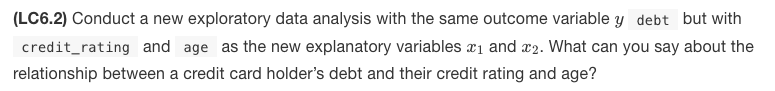

In [59]:
# Importa o dataset Credit
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_10/Credit.csv'
df_credit = pd.read_csv(path)

print(f"O shape do dataset é: {df_credit.shape}")


display(df_credit.head())

O shape do dataset é: (400, 12)


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [65]:
df_credit_ch6 = df_credit[['Unnamed: 0', 'Balance', 'Limit', 'Income', 'Rating', 'Age']]
rename_dict = {'Unnamed: 0': 'ID' ,'Balance': 'debt', 'Limit': 'credit_limit', 'Income': 'income', 'Rating': 'credit_rating', 'Age': 'age'}
df_credit_ch6 = df_credit_ch6.rename(columns=rename_dict)
df_credit_ch6 = df_credit_ch6[['debt', 'credit_rating', 'age']]
display(df_credit_ch6.head())

,debt,credit_rating,age
0,333,283,34
1,903,483,82
2,580,514,71
3,964,681,36
4,331,357,68


In [66]:
# Printa as estatísticas descritivas do dataset
display(df_credit_ch6.describe())

,debt,credit_rating,age
count,400.000000,400.000000,400.000000
mean,520.015000,354.940000,55.667500
std,459.758877,154.724143,17.249807
min,0.000000,93.000000,23.000000
25%,68.750000,247.250000,41.750000
50%,459.500000,344.000000,56.000000
75%,863.000000,437.250000,70.000000
max,1999.000000,982.000000,98.000000


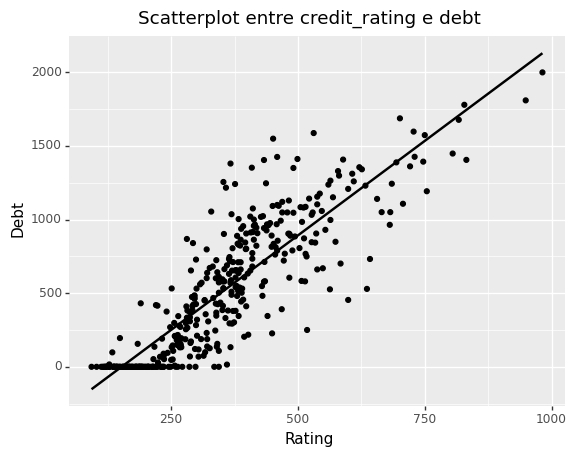

In [69]:
# Printa o scatterplot entre rating e debt

plot = (
    ggplot(df_credit_ch6, aes(x='credit_rating', y='debt')) +
    geom_point()
    + labs(title='Scatterplot entre credit_rating e debt',
           x='Rating',
           y='Debt')
    + geom_smooth(method='lm', se=False)
)

print(plot)

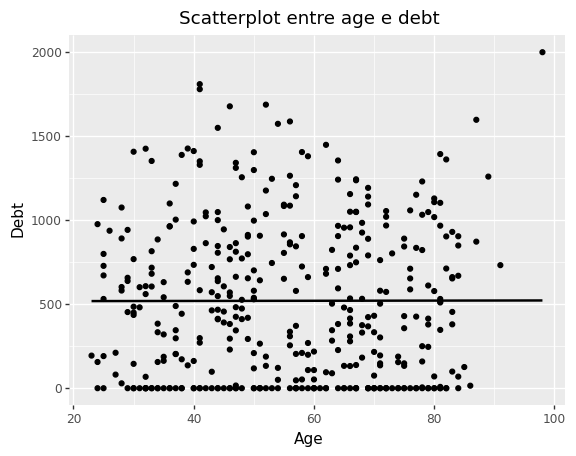

In [71]:
# Printa o scatterplot entre age e debt

plot = (
    ggplot(df_credit_ch6, aes(x='age', y='debt')) +
    geom_point()
    + labs(title='Scatterplot entre age e debt',
           x='Age',
           y='Debt')
    + geom_smooth(method='lm', se=False)
)

print(plot)

**OBSERVAÇÕES:**


A partir dos gráficos acima, percebe-se que existe uma correlação positiva entre a rating de crédito de uma pessoa e seu débito, indicando que pessoas que usam mais o crédito são as que possuem um melhor rating.

Quanto ao débito e a idade, não foi possível visualizar uma relação significativa, indicando que talvez a idade não seja um bom preditor para o débito.

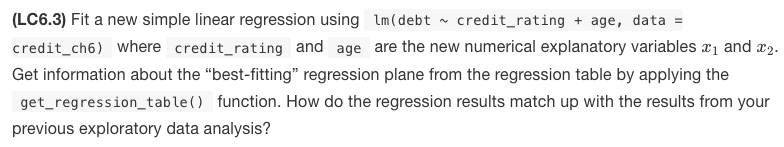

In [72]:
# Ajustar modelo de regressão com interação entre age e gender
model = smf.ols('debt ~ credit_rating + age', data=df_credit_ch6).fit()

# Obter a tabela de coeficientes
regression_table = model.summary().tables[1]

display(regression_table)


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-269.5811,44.806,-6.017,0.000,-357.668,-181.494
credit_rating,2.5933,0.074,34.840,0.000,2.447,2.740
age,-2.3508,0.668,-3.521,0.000,-3.663,-1.038


**OBSERVAÇÕES:**

O coeficiente de credit_rating se mostrou positivo, provando que de fato quanto maior o rating, maior a débito. A idade, ao contrário do que foi hipotetizado na análise exploratoria, apresentou um coeficiente de magnitude similar ao do rating, mostrando que é um fator relevante na regressão, porém com um sinal negativo.
